In [1]:
import csv
import xml.etree.ElementTree as ET
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from data_manager import *
from metadata import *

In [150]:
# xmlfile = '/home/yuncong/Downloads/LM30_export.xml'
xmlfile = '/home/yuncong/Downloads/LM40_export.xml'

In [151]:
# create element tree object
tree = ET.parse(xmlfile)

# get root element
root = tree.getroot()

In [152]:
prefix = '{http://www.mbfbioscience.com/2007/neurolucida}'

In [153]:
neurolucida_name_map = \
{"Contour Name 1": 'RMC',
"Contour Name 2": '3N',
"Contour Name 3": 'fr',
'Brain': 'outerContour',
 'SNR': 'SNR'}

In [154]:
contours = defaultdict(list)

for item in root.findall(prefix+'contour'):
    name = neurolucida_name_map[item.attrib['name']]
    curr_contour = []
#     try:
#         resolution = float(item.findall(prefix+'resolution')[0].text)
#         print resolution
#     except:
#         pass
    for p in item.findall(prefix+'point'):
        curr_contour.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    contours[name].append(np.array(curr_contour))
    
contours.default_factory = None

In [155]:
# markers = defaultdict(list)
markers = {}
name = 'SNR'

for item in root.findall(prefix+'marker'):
    curr_markers = []
    for p in item.findall(prefix+'point'):
        curr_markers.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    markers[name] = np.array(curr_markers)
    
# markers.default_factory = None

In [156]:
contour_colors = dict(zip(contours.keys(), np.array(random_colors(len(contours)))/255.))
marker_colors = dict(zip(markers.keys(), np.array(random_colors(len(markers)))/255.))

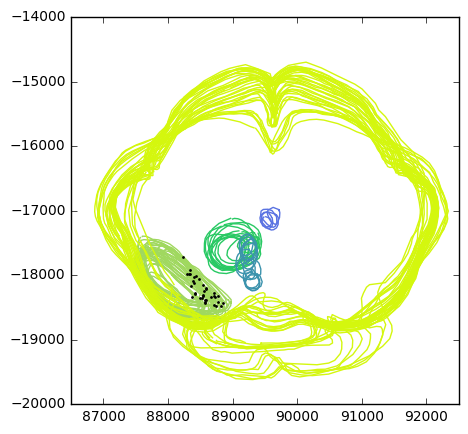

In [157]:
plt.figure(figsize=(5,5));

for name, cnts in contours.iteritems():    
    for cnt in cnts:
        plt.plot(cnt[:, 0], cnt[:, 1], c=contour_colors[name]);

for name, mkrs in markers.iteritems():
    plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

plt.axis('equal');
    
# plt.title(name);